#**<center>SPACESHIP TITANIC COMPETITATION</center>**

#**1. Introduction**

We needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!


<center><img src="https://storage.googleapis.com/kaggle-media/competitions/Spaceship%20Titanic/joel-filipe-QwoNAhbmLLo-unsplash.jpg" width=50%></center>


To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

#**2. Problem Statement**

In this dataset, we will try to solve one such problem which is a slightly modified version of Titanic which is the Spaceship Titanic. The problem statement of this project is like a spaceship having people from different planets on a voyage but due to some reasons, some people have been transported to another dimension. Our task is to predict who will get transported and who will remain on the spaceship.

#**3. Importing Libraries**

In [1]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#**4. Loading Dataset**

Now let’s load the tain and test dataset into the panda’s data frame and print its first five rows.

In [3]:
data_train=pd.read_csv("/content/train.csv")
data_test=pd.read_csv("/content/test.csv")

In [4]:
print("data train shape:",data_train.shape)
data_train.head()

data train shape: (8693, 14)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


#**5. Data Description**

The data present the different columns have the meaning as follows:

- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [5]:
#Information of the train
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


**Observation**

 we have 1 bool,6 float64 and 7 objects dtypes.

 let's change the Target column that is Transported dtype from the boolen to object because, Some data visualization libraries may have difficulty plotting boolean values, but they can handle categorical variables represented as strings or integers. Changing the data type to object can make it easier to create visualizations of your data.

In [6]:
data_train['Transported'].replace(to_replace=[False,True],value=['No','Yes'],inplace=True)

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 950.9+ KB


In [8]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


**Observation**
We have 6 float64 and 7 object dtypes.

#**6. Data Exploration**

##**6.1 Data pre processing**

###**Train data set**

In [9]:
# checking the duplicate values
data_train.duplicated().sum()

0

In [10]:
# Checking is there any null values or missing values 
data_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [11]:
#Representation of the null values in the formate of percentage
null = pd.DataFrame({"no of null value":data_train.isnull().sum(),
                     "percentage of nul value":(data_train.isnull().sum()/len(data_train))*100})
null

,no of null value,percentage of nul value
PassengerId,0,0.000000
HomePlanet,201,2.312205
CryoSleep,217,2.496261
Cabin,199,2.289198
Destination,182,2.093639
Age,179,2.059128
VIP,203,2.335212
RoomService,181,2.082135
FoodCourt,183,2.105142
ShoppingMall,208,2.392730


Let's Categories the dataset columns into numerical data and categorical data for better understanding or which helps in fill the null values or missing values.

In [12]:
#Categorizing the data types
train_continuous_column=[]
train_categorical_column=[]
for i in data_train:
  if data_train[i].dtype=='object':
    train_categorical_column.append(i)
  else:
    train_continuous_column.append(i)

**Handling the missing values**

In [13]:
train_categorical_column


['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name',
 'Transported']

In [14]:
#Handling null values of categorical columns
data_train["HomePlanet"].fillna((data_train["HomePlanet"].mode()[0]),inplace=True )
data_train['CryoSleep'].fillna((data_train['CryoSleep'].mode()[0]),inplace=True )
data_train['Cabin'].fillna((data_train['Cabin'].mode()[0]),inplace=True )
data_train['Destination'].fillna((data_train['Destination'].mode()[0]),inplace=True )
data_train['VIP'].fillna((data_train['VIP'].mode()[0]),inplace=True )

In [15]:
train_continuous_column

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [16]:
#Handling the missing values of the continuous data
data_train['Age'].fillna((data_train['Age'].mean()), inplace=True)
data_train['RoomService'].fillna((data_train['RoomService'].mean()), inplace=True)
data_train['FoodCourt'].fillna((data_train['FoodCourt'].mean()), inplace=True)
data_train['ShoppingMall'].fillna((data_train['ShoppingMall'].mean()), inplace=True)
data_train['Spa'].fillna((data_train['Spa'].mean()), inplace=True)
data_train['VRDeck'].fillna((data_train['VRDeck'].mean()), inplace=True)

In [17]:
data_train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [18]:
# this is for only Numerical columns
data_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.339054,659.739364,1594.434978,597.417440,1124.675871,1133.259049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


**Observation**

* The average Age of passenger is 29 and the oldest passenger in the spaceship is 79 years.
* The average RoomService Amount the passenger has billed is 225 and the highest amount is 14327.
* The average FoodCourt Amount the passenger has billed is 458 and the highest amount is 29813.
* The average ShoppingMall Amount the passenger has billed is 174 and the highest amount is 23492.
* The average Spa Amount the passenger has billed is 311 and the highest amount is 22408.
* The average VRDeck Amount the passenger has billed is 305 and the highest amount is 24133
* And also here we need to find the passenger who are not billed for these things because we can find the value zero, in the dataset so lets consider value zero category is not billed.

In [19]:
data_train.describe(include='object')

,PassengerId,HomePlanet,Cabin,Destination,Name,Transported
count,8693,8693,8693,8693,8493,8693
unique,8693,3,6560,3,8473,2
top,0001_01,Earth,G/734/S,TRAPPIST-1e,Gollux Reedall,Yes
freq,1,4803,207,6097,2,4378


Here we can observe that the 
- Majority of the people transported from Earth
- Majority of the people transported from Cabin G/734/S
- Majority of the people transported to TRAPPIST-1e
- Majority of the people transported successfully
- But the cabin has the 6560 unique categories or values in it so we cannot use directly to the model.

###**Test data set**

In [20]:
data_test.duplicated().sum()

0

In [21]:
data_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [22]:
null = pd.DataFrame({"no of null value":data_test.isnull().sum(),
                     "percentage of nul value":(data_test.isnull().sum()/len(data_test))*100})
null

,no of null value,percentage of nul value
PassengerId,0,0.000000
HomePlanet,87,2.034136
CryoSleep,93,2.174421
Cabin,100,2.338087
Destination,92,2.151040
Age,91,2.127660
VIP,93,2.174421
RoomService,82,1.917232
FoodCourt,106,2.478373
ShoppingMall,98,2.291326


In [23]:
test_continuous_column=[]
test_categorical_column=[]
for i in data_test:
  if data_test[i].dtype=='object':
    test_categorical_column.append(i)
  else:
    test_continuous_column.append(i)

In [24]:
test_categorical_column

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name']

In [25]:
#Fill null values in categorical data
data_test['HomePlanet'].fillna((data_test["HomePlanet"].mode()[0]), inplace=True)
data_test['CryoSleep'].fillna((data_test['CryoSleep'].mode()[0]), inplace=True)
data_test['Destination'].fillna((data_test['Destination'].mode()[0]), inplace=True)
data_test['VIP'].fillna((data_test['VIP'].mode()[0]), inplace=True)
data_test['Cabin'].fillna((data_test['Cabin'].mode()[0]), inplace=True)

In [26]:
test_continuous_column

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [27]:
#fill null values in numerical data
data_test['Age'].fillna((data_test['Age'].mean()), inplace=True)
data_test['RoomService'].fillna((data_test['RoomService'].mean()), inplace=True)
data_test['FoodCourt'].fillna((data_test['FoodCourt'].mean()), inplace=True)
data_test['ShoppingMall'].fillna((data_test['ShoppingMall'].mean()), inplace=True)
data_test['Spa'].fillna((data_test['Spa'].mean()), inplace=True)
data_test['VRDeck'].fillna((data_test['VRDeck'].mean()), inplace=True)

###**6.2 Feature Engineering**

In data description they specifically mentioned that the,
- PassengerID is in ther format of gggg and pp, that is group name/ID and the group number, so we are creating new feature GroupId and the GroupNumber.
- In cabin we got 6560 different values, because cabin has 3 value in it like deck/num/side, where side can be either P for Port or S for Starboard, so we need to spilt deck and side as new feature


In [28]:
#Cabin has three values deck/num/side, so we'll create two columns for deck and side
data_train["Deck"] = data_train["Cabin"].apply(lambda x: str(x).split("/")[0])
data_train["side"] =data_train["Cabin"].apply(lambda x: x.split("/")[2])

In [29]:
#Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling 
#with and pp is their number within the group, so we'll create two new features GroupId and GroupIdNumber
data_train["GroupId"] = data_train["PassengerId"].apply(lambda x: x.split("_")[0])
data_train["GroupIdNumber"] =data_train["PassengerId"].apply(lambda x: x.split("_")[1])

In [30]:
# Creating new feature InGroup to indicate if a passenger is alone or in group
Group_train =data_train[data_train["GroupId"].duplicated()]["GroupId"]
data_train["InGroup"] = data_train["GroupId"].apply(lambda x: x in Group_train.values)

###**New feature of Test Data**

In [31]:
#Cabin has three values deck/num/side, so we'll create two columns for deck and side
data_test["Deck"] = data_test["Cabin"].apply(lambda x: str(x).split("/")[0])
data_test["side"] = data_test["Cabin"].apply(lambda x: x.split("/")[2])

In [32]:
#Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling 
#with and pp is their number within the group, so we'll create two new features GroupId and GroupIdNumber
data_test["GroupIdNumber"] = data_test["PassengerId"].apply(lambda x: x.split("_")[1])
data_test["GroupId"] = data_test["PassengerId"].apply(lambda x: x.split("_")[0])

In [33]:
# Creating new feature InGroup to indicate if a passenger is alone or in group
Group_test =data_test[data_test["GroupId"].duplicated()]["GroupId"]
data_test["InGroup"] = data_test["GroupId"].apply(lambda x: x in Group_test.values)

**Dropping unwanted columns**

In [34]:
#Drop 'PassengerId','Cabin','Name','GroupId','GroupIdNumber' from df_train
data_train.drop(['PassengerId','Cabin','Name','GroupId','GroupIdNumber'], axis=1, inplace=True)

#Save PassengerId and Name
Id_test_list = data_test["PassengerId"].tolist()

#Drop 'PassengerId','Cabin','Name','GroupId','GroupIdNumber' from df_test
data_test.drop(['PassengerId','Cabin','Name','GroupId','GroupIdNumber'], axis=1, inplace=True)

###**6.3 Exploratory Data Analysis** 

**Univariate Analysis**

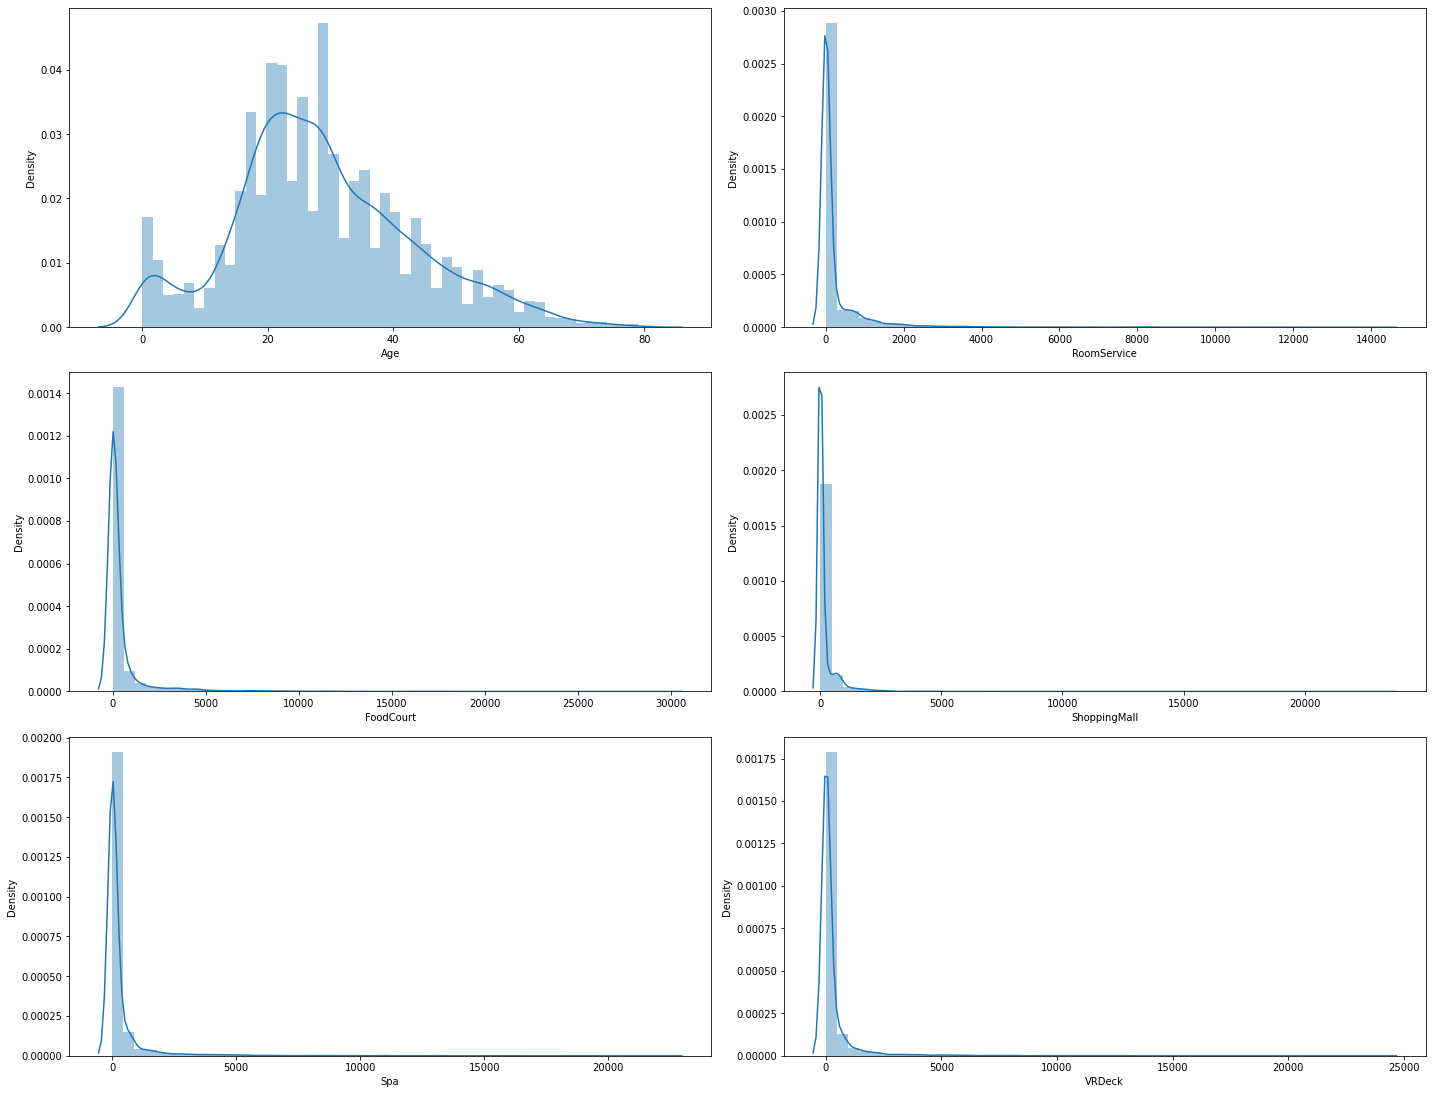

In [35]:
#Plot distribution of numerical columns
fig = plt.figure(figsize= (20,25))
for i, col in enumerate(train_continuous_column):
    
    ax=fig.add_subplot( 5, 2, i+1)
    
    sns.distplot(data_train[col])

fig.tight_layout()  
plt.show()

here we can see that the in continuous column:

* The distribution of age is normal distribution
* The distribution of the variables: RoomServie, FoodCourt, ShoppingMall, Spa, RDeck is skewed, we can confirme that using skew function.

In [36]:
#for categorical data we have created the new columns so add those columns for the categorical features
new_categ_features=[col for col in data_train.select_dtypes(exclude=['number'])]
new_categ_features

['HomePlanet',
 'CryoSleep',
 'Destination',
 'VIP',
 'Transported',
 'Deck',
 'side',
 'InGroup']

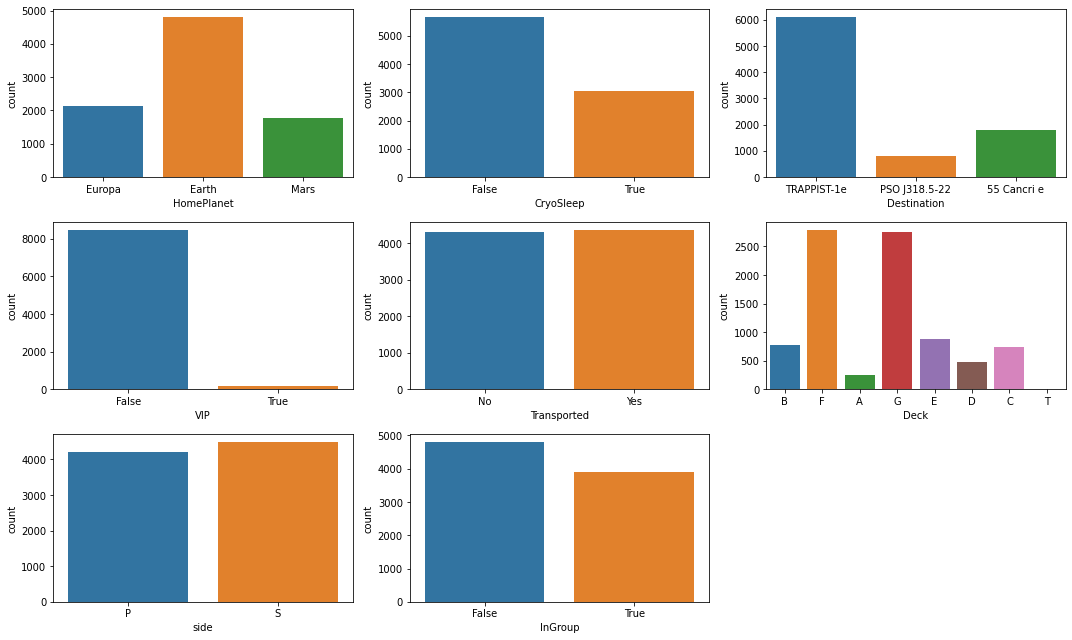

In [37]:
fig = plt.figure(figsize= (15,9))
for i, col in enumerate(new_categ_features):
  ax=fig.add_subplot(3, 3, i+1)
  sns.countplot(x=data_train[col], ax=ax)

fig.tight_layout()  
plt.show()

* Most passengers were traveling on both Deck F, G and on Starboard-side.
* More than half of passengers choose to travel alone.
*Few passengers were in CryoSleep.
*Passengers had an overall even chance of being transported

In [38]:
data_train[train_continuous_column].skew().sort_values(ascending=False)

ShoppingMall    12.781346
VRDeck           7.905655
Spa              7.717657
FoodCourt        7.178159
RoomService      6.399969
Age              0.423478
dtype: float64

here we can see that the expect age remaining are all highly skewed it is greater than 0-0.5, and we are going to remove these outliers before feature extraction

**Bivariate Analysis**

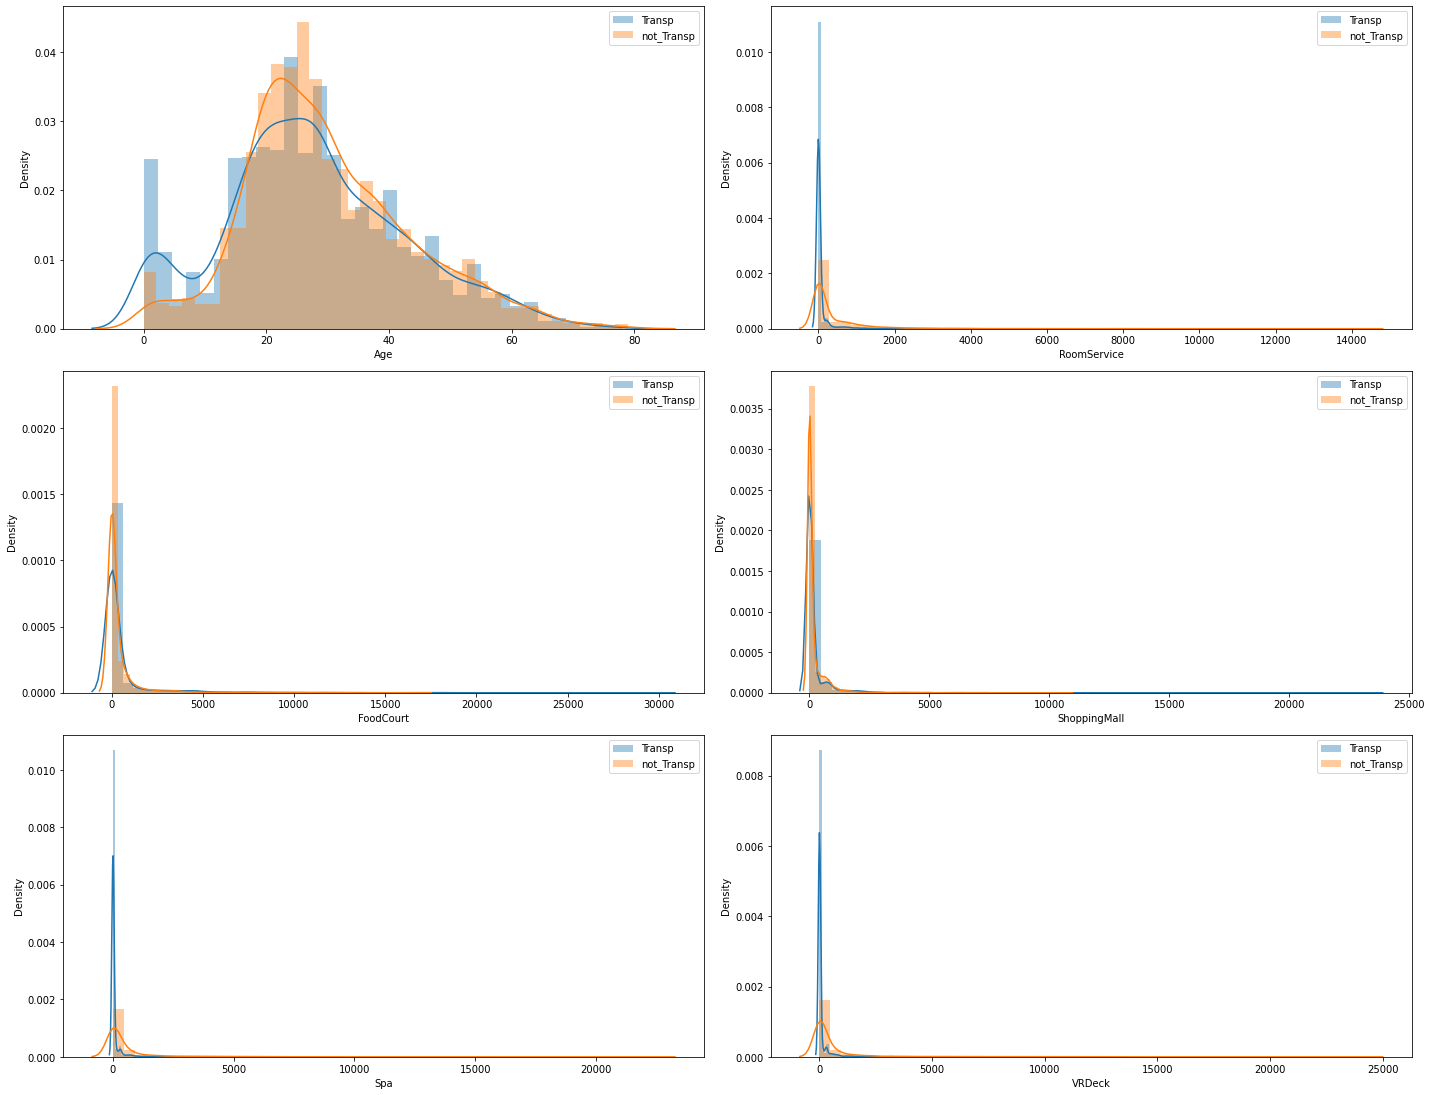

In [39]:
Transported_data=data_train[data_train['Transported']=='Yes']
NotTransported_data=data_train[data_train['Transported']=='No']
fig = plt.figure(figsize= (20,25))
for i, col in enumerate(train_continuous_column):
    
    ax=fig.add_subplot( 5, 2, i+1)
    
    sns.distplot(Transported_data[col],label='Transp')
    sns.distplot(NotTransported_data[col],label='not_Transp')
    plt.legend()
    
fig.tight_layout()  
plt.show()

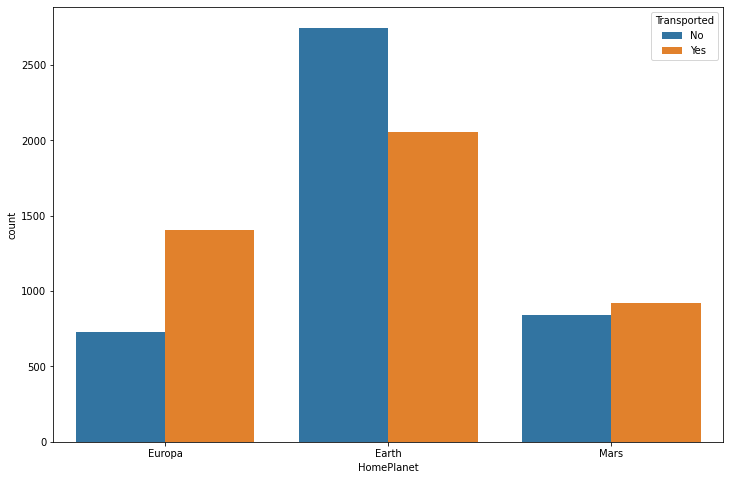

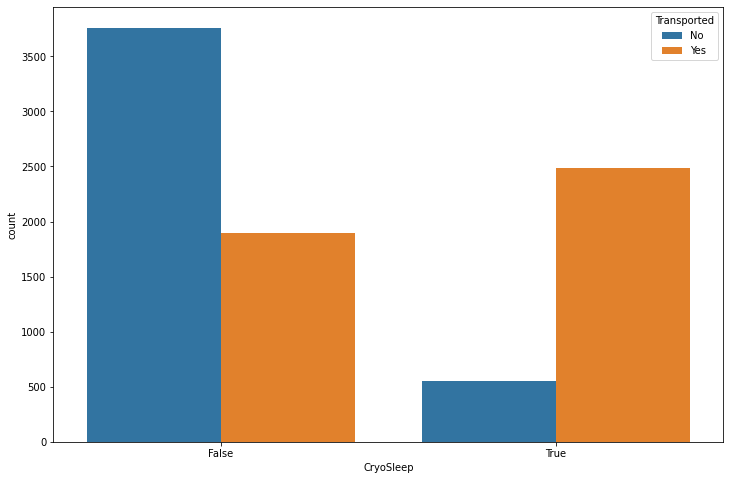

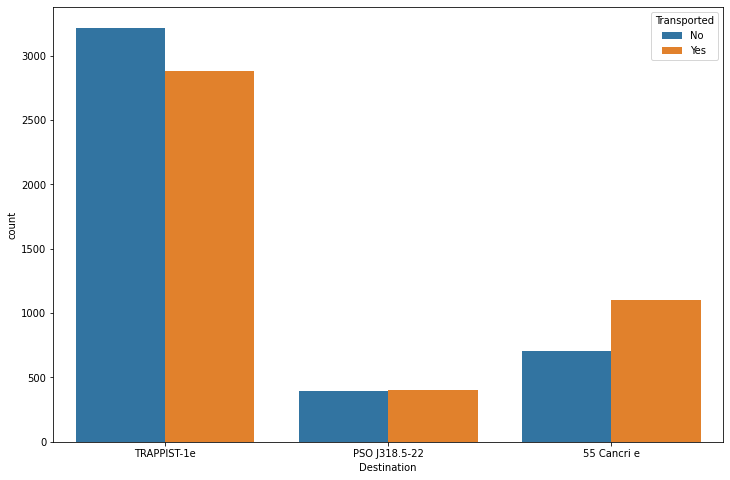

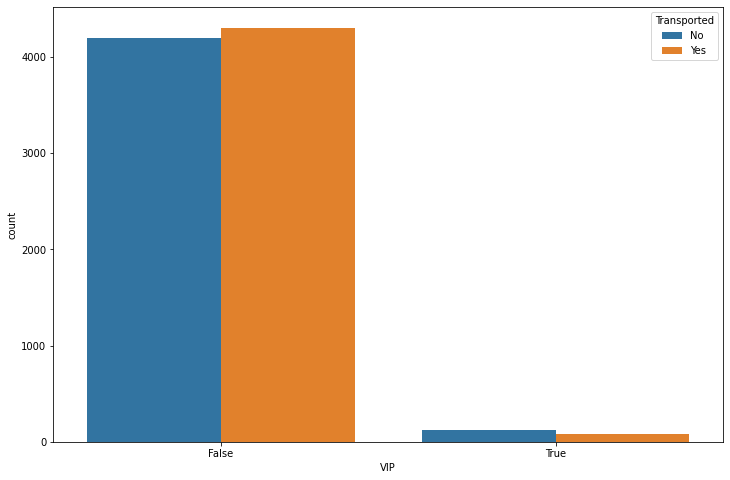

<Figure size 864x576 with 0 Axes>

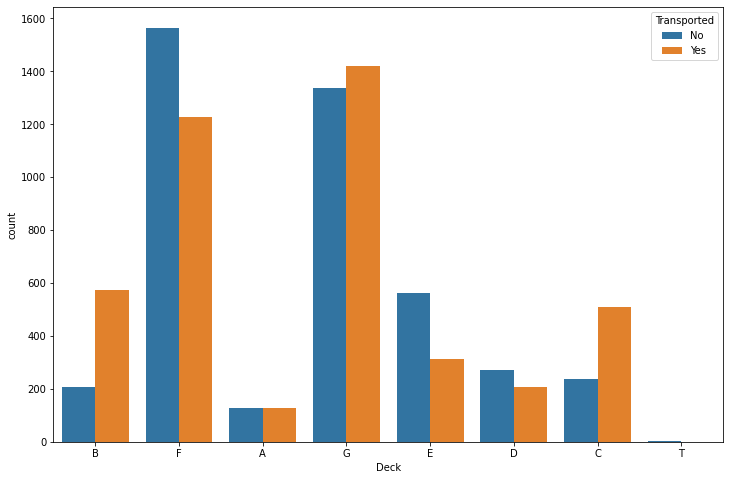

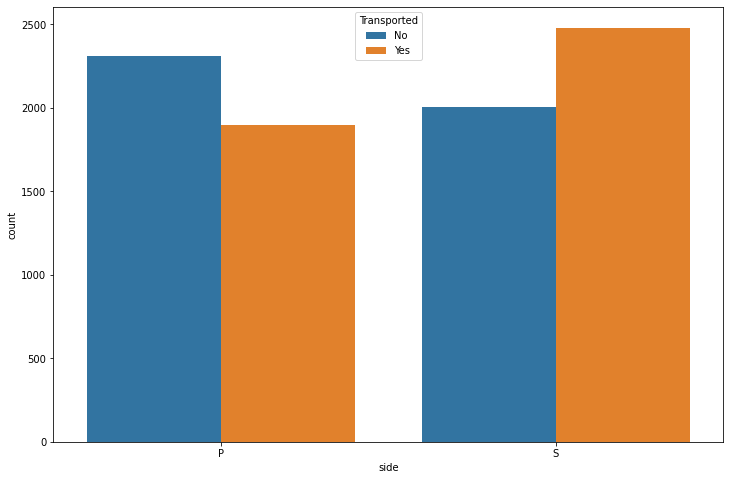

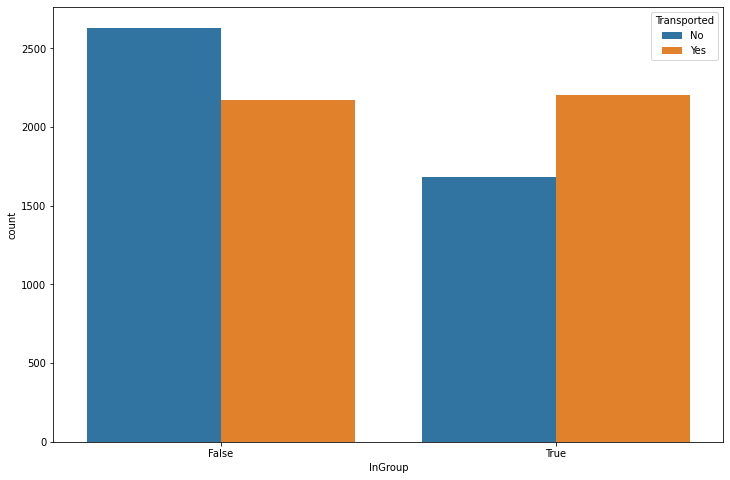

In [40]:
for col in new_categ_features:
    plt.figure(figsize=(12,8))
    if col!="Transported":
        sns.countplot(x=col,hue='Transported',data=data_train)

* Passengers from earth are less likely to be transported.
*Passengers in CryoSleep are more likely to be transported.
*Passengers who are traveling to Trappist-le are less likely to be transported.
*Being a VIP doesn't seem to significantly affect chances of being transported.
*passengers on decks F and port-side are more likely to be transported.
*Passengers who are traveling in group are less likely to be transported.

**Multivariate Analysis**

To campare the replationship with target that is Transported we 1st need to convert from categorical numerical so for now we can use lable encoder for only that column or we can do for every categorical column here or we can do for remaining in the next step. 

In [41]:
data_train.corr()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,InGroup
CryoSleep,1.000000,-0.070736,-0.078281,-0.243986,-0.205682,-0.206366,-0.198392,-0.193107,0.091562
Age,-0.070736,1.000000,0.091574,0.067612,0.127937,0.032655,0.120992,0.099210,-0.133769
VIP,-0.078281,0.091574,1.000000,0.056595,0.126006,0.018483,0.060573,0.123092,0.034027
RoomService,-0.243986,0.067612,0.056595,1.000000,-0.015521,0.052962,0.009925,-0.019207,-0.019909
FoodCourt,-0.205682,0.127937,0.126006,-0.015521,1.000000,-0.013934,0.220587,0.224275,0.066816
ShoppingMall,-0.206366,0.032655,0.018483,0.052962,-0.013934,1.000000,0.013678,-0.007189,-0.028857
Spa,-0.198392,0.120992,0.060573,0.009925,0.220587,0.013678,1.000000,0.147957,0.043363
VRDeck,-0.193107,0.099210,0.123092,-0.019207,0.224275,-0.007189,0.147957,1.000000,0.043948
InGroup,0.091562,-0.133769,0.034027,-0.019909,0.066816,-0.028857,0.043363,0.043948,1.000000


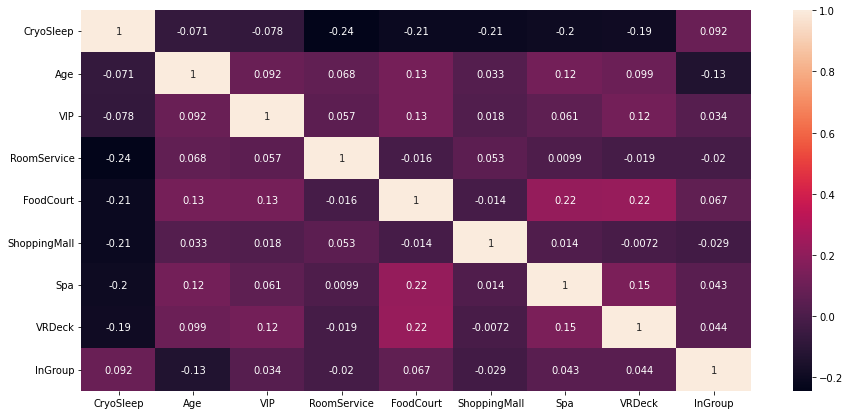

In [42]:
plt.figure(figsize=(15,7))
sns.heatmap(data_train.corr(), annot=True)
plt.show()

#**6. Data post processing**

In [43]:
data_train.to_csv('cleaned_train.csv')

In [44]:
data_test.to_csv('cleaned_test.csv')

 **Removing Outliers**

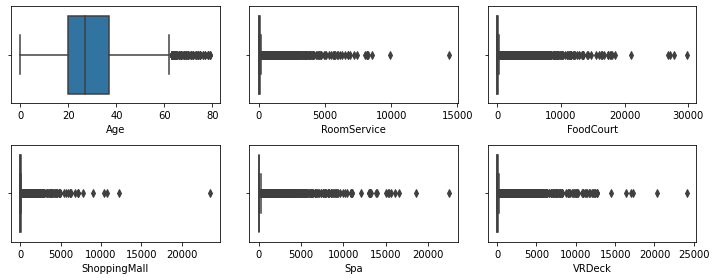

In [45]:
fig = plt.figure(figsize= (10,4))
for i, col in enumerate(train_continuous_column):
    
    ax=fig.add_subplot( 2, 3, i+1)
    
    sns.boxplot(x=data_train[col],ax=ax)
fig.tight_layout()  
plt.show()

For right-skewed data with zero values, neither log nor box-cox transformations can be used. Both of these transformations require that the data be positive and non-zero. In this case, the square root transformation and the Interquartile Range (IQR) method can be considered as alternatives.

**Square root transformation**

In [46]:
sqrt_train=data_train.copy()
sqrt_train[['Spa','RoomService','VRDeck','FoodCourt','ShoppingMall']] = np.sqrt(sqrt_train[
    ['Spa','RoomService','VRDeck','FoodCourt','ShoppingMall']])

In [47]:
Outliers_sqrt=sqrt_train.skew()
Before=data_train.skew()

In [48]:
data=data_train.copy()
Q1 = data[['Spa','RoomService','VRDeck','FoodCourt','ShoppingMall']].quantile(0.25)
Q3 = data[['Spa','RoomService','VRDeck','FoodCourt','ShoppingMall']].quantile(0.75)
IQR = Q3 - Q1
data[['Spa','RoomService','VRDeck','FoodCourt','ShoppingMall']] = (data[
    ['Spa','RoomService','VRDeck','FoodCourt','ShoppingMall']] - Q1) / IQR

In [49]:
Outliers_IQR=data.skew()

In [50]:
compair2=pd.DataFrame({'SquareRoot':Outliers_sqrt,'before':Before,'IQR':Outliers_IQR})
compair2

,SquareRoot,before,IQR
CryoSleep,0.632024,0.632024,0.632024
Age,0.423478,0.423478,0.423478
VIP,6.381293,6.381293,6.381293
RoomService,2.308276,6.399969,6.399969
FoodCourt,2.865913,7.178159,7.178159
ShoppingMall,2.659647,12.781346,12.781346
Spa,2.981097,7.717657,7.717657
VRDeck,3.072468,7.905655,7.905655
InGroup,0.212195,0.212195,0.212195


So here we try to remove outliers with IQR and Squrae root transformation, between the square root and IQR the best is Square root transformation because it helps to make normal distribution better than the IQR.

###**6.2 Feature label encoder**

In [51]:
data_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,side,InGroup
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,No,B,P,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Yes,F,S,False
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,No,A,S,True
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,No,A,S,True
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Yes,F,S,False


In [52]:
data_train=pd.get_dummies(data_train,columns=['HomePlanet','CryoSleep','Destination','VIP','Deck','side','InGroup'])
data_train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,side_P,side_S,InGroup_False,InGroup_True
0,39.0,0.0,0.0,0.0,0.0,0.0,No,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,Yes,1,0,0,...,0,0,0,1,0,0,0,1,1,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,No,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,No,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,16.0,303.0,70.0,151.0,565.0,2.0,Yes,1,0,0,...,0,0,0,1,0,0,0,1,1,0


In [53]:
data_test=pd.get_dummies(data_test,columns=['HomePlanet','CryoSleep','Destination','VIP','Deck','side','InGroup'])

###**6.3 Feature Extraction**

In [54]:
X = data_train.drop(['Transported'], axis=1)
y = data_train['Transported']

In [55]:
X_train, X_val, y_train, y_val = train_test_split(
...     X, y, test_size=0.30, random_state=42)

In [56]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)

(6085, 28) (6085,)
(2608, 28) (2608,)


In [57]:
y_test = data_test

###**6.4 Feature scaling**

In [58]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_val)
scaler.transform(y_test)

array([[-0.12910431, -0.33397003, -0.29390637, ...,  0.97548527,
         0.90295854, -0.90295854],
       [-0.68647462, -0.33397003, -0.28828623, ...,  0.97548527,
         0.90295854, -0.90295854],
       [ 0.14958085, -0.33397003, -0.29390637, ...,  0.97548527,
         0.90295854, -0.90295854],
       ...,
       [-0.01357913, -0.33397003, -0.29390637, ..., -1.0251308 ,
         0.90295854, -0.90295854],
       [-0.01357913, -0.33397003,  1.3796473 , ..., -1.0251308 ,
         0.90295854, -0.90295854],
       [ 0.98563631, -0.33397003, -0.29390637, ...,  0.97548527,
         0.90295854, -0.90295854]])

###**7 Model building and Analysis**

In [59]:
scores = []
models = [LogisticRegression(class_weight='balanced', random_state=42), 
        DecisionTreeClassifier(class_weight='balanced', random_state=42), 
        RandomForestClassifier(class_weight='balanced', random_state=42), 
        KNeighborsClassifier(), SVC(random_state=42),
        GradientBoostingClassifier(random_state=42),
        CatBoostClassifier(random_state=42),
        XGBClassifier(class_weight='balanced', random_state=42),
        BaggingClassifier(random_state=42)
        ]

In [60]:
for model in models:
  # Extracting model name
  model_name = type(model).__name__

  # Fit the model on train data
  model.fit(X_train, y_train)

  # Make predictions using test data
  y_pred = model.predict(y_test)

  # Make predictions using validation data
  y_val_pred = model.predict(X_val)

  # Make predictions using train data
  y_train_pred = model.predict(X_train)

  # Accuracy on train set
  Accuracy_score_train = accuracy_score(y_train, y_train_pred)

  # Accurace on validation set
  Accuracy_score_val = accuracy_score(y_val, y_val_pred)

  # Display the accuracy of the model
  print('Performance Metrics for', model_name, ':')

  print('Confusion matrix:\n',confusion_matrix(y_val,y_val_pred))
  print('[Accuracy-Score Train]:', Accuracy_score_train)
  print('[Accuracy-Score Validation]:', Accuracy_score_val)
  print('--------------------\n')

  scores.append((model_name, Accuracy_score_train,Accuracy_score_val))

Performance Metrics for LogisticRegression :
Confusion matrix:
 [[ 960  329]
 [ 243 1076]]
[Accuracy-Score Train]: 0.7949055053410025
[Accuracy-Score Validation]: 0.7806748466257669
--------------------

Performance Metrics for DecisionTreeClassifier :
Confusion matrix:
 [[951 338]
 [355 964]]
[Accuracy-Score Train]: 0.9607230895645029
[Accuracy-Score Validation]: 0.7342791411042945
--------------------

Performance Metrics for RandomForestClassifier :
Confusion matrix:
 [[1029  260]
 [ 313 1006]]
[Accuracy-Score Train]: 0.9607230895645029
[Accuracy-Score Validation]: 0.7802914110429447
--------------------

Performance Metrics for KNeighborsClassifier :
Confusion matrix:
 [[ 970  319]
 [ 269 1050]]
[Accuracy-Score Train]: 0.8369761709120789
[Accuracy-Score Validation]: 0.7745398773006135
--------------------

Performance Metrics for SVC :
Confusion matrix:
 [[ 862  427]
 [ 151 1168]]
[Accuracy-Score Train]: 0.7912900575184881
[Accuracy-Score Validation]: 0.7783742331288344
-----------

In [61]:
models_score = pd.DataFrame(data=scores, columns=['Model', 'Accuracy-Score Train', 'Accuracy-Score Validation'])
models_score

,Model,Accuracy-Score Train,Accuracy-Score Validation
0,LogisticRegression,0.794906,0.780675
1,DecisionTreeClassifier,0.960723,0.734279
2,RandomForestClassifier,0.960723,0.780291
3,KNeighborsClassifier,0.836976,0.774540
4,SVC,0.791290,0.778374
5,GradientBoostingClassifier,0.824651,0.789877
6,CatBoostClassifier,0.866393,0.794479
7,XGBClassifier,0.816598,0.791794
8,BaggingClassifier,0.948562,0.769939


when we observe the models_score we can say that the XGB Classifier has fit best to predict the model as can see there is slightly overfitted as compared to other model so lets do the hyperparameter tuning for XGB Classifier, Random Forest and GradientBossing

## **7.2 Hyperparameter Tuning**

* here we will tune **XGB Classifier, LogisticRegression and GradientBossing**.

**XGB Classifier**

In [62]:
# Creating a parameter grid for XGB Classifier

# GSCV on XGB

xg_param_grid = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
              'learning_rate': [0.1, 0.3, 0.5],
              'n_estimators': [50, 100, 200]}

xgb = XGBClassifier(class_weight='balanced', random_state=42)

# Instantiate GridSearchCV
xg_cv = GridSearchCV (estimator = xgb, param_grid = xg_param_grid, scoring ='f1', cv = 5)

# fit the model
xg_cv.fit(X_train,y_train)

# returns the estimator with the best performance
print(xg_cv.best_estimator_)

print("[Hyperparameters]:", xg_cv.best_params_)
print("[Train Score]:", xg_cv.best_score_)
print("[Test Score]:", accuracy_score(y_val, xg_cv.predict(X_val)))

XGBClassifier(class_weight='balanced', n_estimators=50, random_state=42)
[Hyperparameters]: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
[Train Score]: nan
[Test Score]: 0.7871932515337423


**RandomForest**

In [63]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110, 120],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_cv = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5)
rf_cv.fit(X_train, y_train)

# Printing metrics
print("[Hyperparameters]:", rf_cv.best_params_)
print("[Train Score]:", rf_cv.best_score_)
print("[Test Score]:", accuracy_score(y_val, rf_cv.predict(X_val)))

[Hyperparameters]: {'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 300}
[Train Score]: 0.8027937551355793
[Test Score]: 0.7906441717791411


**Gradient Boosting**

In [64]:
parameters_gb ={'n_estimators': [100, 200, 300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [3, 5, 7]}
gb=GradientBoostingClassifier(random_state=42)
# Instantiate GridSearchCV
gb_cv = GridSearchCV (gb, parameters_gb, cv = 5)

# fit the model
gb_cv.fit(X_train,y_train)

# returns the estimator with the best performance
print(gb_cv.best_estimator_)

print("[Hyperparameters]:", gb_cv.best_params_)
print("[Train Score]:", gb_cv.best_score_)
print("[Test Score]:", accuracy_score(y_val, gb_cv.predict(X_val)))

GradientBoostingClassifier(n_estimators=200, random_state=42)
[Hyperparameters]: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
[Train Score]: 0.8082169268693509
[Test Score]: 0.7921779141104295


### **7.3 Tuned Model Development and Evaluation**

- In this section, we will **develop** and **evaluate** the tuned models.

In [69]:
tuned_scores = []
models = [rf_cv.best_estimator_, gb_cv.best_estimator_, xg_cv.best_estimator_]

In [80]:
for model in models:
  # Extracting model name
  model_name = str(type(model).__name__) + '(Tuned)'

  # Fit the model on train data
  model.fit(X_train, y_train)

  # Make predictions using validation data
  y_val_pred = model.predict(X_val)

  # Make predictions using train data
  y_train_pred = model.predict(X_train)

  # Accuracy on train set
  Accuracy_score_train = accuracy_score(y_train, y_train_pred)

  # Accurace on validation set
  Accuracy_score_val = accuracy_score(y_val, y_val_pred)

  # Display the accuracy of the model
  print('Performance Metrics for', model_name, ':')

  print('Confusion matrix:\n',confusion_matrix(y_val,y_val_pred))
  print('Classificaton report:\n',classification_report(y_val,y_val_pred))
  print('[Accuracy-Score Train]:', Accuracy_score_train)
  print('[Accuracy-Score Validation]:', Accuracy_score_val)
  print('--------------------\n')

  scores.append((model_name, Accuracy_score_train, Accuracy_score_val))

Performance Metrics for RandomForestClassifier(Tuned) :
Confusion matrix:
 [[1009  280]
 [ 266 1053]]
Classificaton report:
               precision    recall  f1-score   support

          No       0.79      0.78      0.79      1289
         Yes       0.79      0.80      0.79      1319

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608

[Accuracy-Score Train]: 0.8612982744453574
[Accuracy-Score Validation]: 0.7906441717791411
--------------------

Performance Metrics for GradientBoostingClassifier(Tuned) :
Confusion matrix:
 [[ 970  319]
 [ 223 1096]]
Classificaton report:
               precision    recall  f1-score   support

          No       0.81      0.75      0.78      1289
         Yes       0.77      0.83      0.80      1319

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79 

When we see the tuned score of the model random GradiantBoosting Classifier is the best, it gives the accuracy score of 0.8377 for train and 0.7921 for val data so it is the best model for predicting.

###**8. Test Data**

- we select **GradientBoostingClassifer** as our final model.

In [81]:
clf = gb_cv.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(y_test)
y_pred

array(['Yes', 'No', 'Yes', ..., 'Yes', 'Yes', 'Yes'], dtype=object)

In [82]:
pred = pd.DataFrame(y_pred)

In [83]:
pred = pred.replace(to_replace='Yes',value="True")
pred = pred.replace(to_replace='No',value="False")

In [84]:
pred

,0
0,True
1,False
2,True
3,True
4,True
...,...
4272,True
4273,False
4274,True
4275,True


In [85]:
subm= pd.read_csv("/content/test.csv")

In [86]:
#Creating the dataset with passengerid of test data and the final prediction
datasets=pd.concat([subm['PassengerId'],pred], axis = 1)

In [87]:
#give the column name in the submission file
datasets.columns =['PassengerId','Transported']

#Saving the dataset in the sample_submission file
datasets.to_csv('sample_submission.csv', index= False)